In [1]:
import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

In [2]:
# Definicion de clases
class Data(Dataset):
    def __init__(self, x, n, w):
        X_np = np.array([x**2, x, np.ones((n,))]).T
        X = torch.from_numpy(X_np).float()
        y = -(x-2)**2 + 3 +0.2*np.sin(16*x)
        Y = torch.from_numpy(y).float()
        self.x = X
        self.y = Y
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len


class Net(nn.Module):
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2 = None
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = self.l2 #sigmoid(self.linear2(self.a1))
        return yhat.squeeze(-1)

In [3]:
# Funcion de ploteo
def PlotStuff(X, dataset, model, epoch, leg=True):
    
    plt.plot(X, model(dataset.x).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X, dataset.y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [4]:
# Funcion de entrenamiento
def train(X, dataset, model, optimizer, criterion, trainloader, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        print("Epoch:", epoch, "MSE:", total)
        if epoch % 300 == 0:    
            PlotStuff(X, dataset, model, epoch, leg=True)
            plt.show()
            model(dataset.x)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=dataset.y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

In [5]:
# Definición del dataset
n = 10000
x = np.linspace(0, 4, n)
w = torch.tensor([0.52864676, 0.04550111, 0.77341328]) #torch.rand(3) 
dataset = Data(x, n, w)

In [27]:
# Definición de hiperparáemtros del modelo
len_batch = round(n/5)
learning_rate = 0.008
n_epochs = 1000

In [28]:
# Definicion del modelo de NN
D_in = 3 # size of input 
H = 2 # size of hidden layer 
D_out = 1 # number of outputs 
model = Net(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=dataset, batch_size=len_batch)

Epoch: 0 MSE: 22.338073313236237


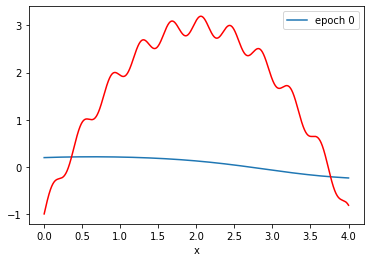

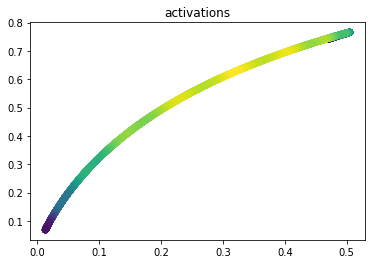

Epoch: 1 MSE: 18.23076367378235
Epoch: 2 MSE: 14.849660754203796
Epoch: 3 MSE: 12.520942211151123
Epoch: 4 MSE: 10.924515783786774
Epoch: 5 MSE: 9.795090556144714
Epoch: 6 MSE: 8.984211802482605
Epoch: 7 MSE: 8.398530066013336
Epoch: 8 MSE: 7.974876523017883
Epoch: 9 MSE: 7.668864369392395
Epoch: 10 MSE: 7.448540985584259
Epoch: 11 MSE: 7.290482938289642
Epoch: 12 MSE: 7.177319288253784
Epoch: 13 MSE: 7.096142113208771
Epoch: 14 MSE: 7.0374457240104675
Epoch: 15 MSE: 6.994335234165192
Epoch: 16 MSE: 6.961904525756836
Epoch: 17 MSE: 6.936728775501251
Epoch: 18 MSE: 6.916449785232544
Epoch: 19 MSE: 6.899467408657074
Epoch: 20 MSE: 6.884700357913971
Epoch: 21 MSE: 6.871424376964569
Epoch: 22 MSE: 6.859152793884277
Epoch: 23 MSE: 6.847559928894043
Epoch: 24 MSE: 6.836426615715027
Epoch: 25 MSE: 6.825607240200043
Epoch: 26 MSE: 6.815003752708435
Epoch: 27 MSE: 6.804552644491196
Epoch: 28 MSE: 6.7942104041576385
Epoch: 29 MSE: 6.783951103687286
Epoch: 30 MSE: 6.773758888244629
Epoch: 31 MSE:

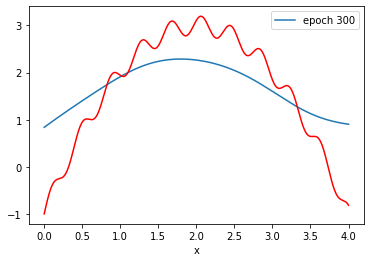

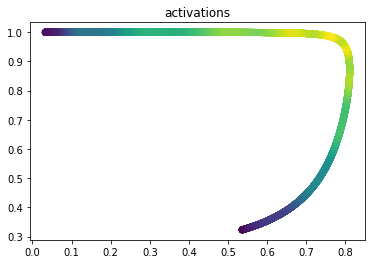

Epoch: 301 MSE: 3.055856689810753
Epoch: 302 MSE: 3.0399962812662125
Epoch: 303 MSE: 3.024182453751564
Epoch: 304 MSE: 3.008414149284363
Epoch: 305 MSE: 2.9926925152540207
Epoch: 306 MSE: 2.977017693221569
Epoch: 307 MSE: 2.9613911658525467
Epoch: 308 MSE: 2.9458122178912163
Epoch: 309 MSE: 2.930282525718212
Epoch: 310 MSE: 2.914800688624382
Epoch: 311 MSE: 2.8993684723973274
Epoch: 312 MSE: 2.8839865922927856
Epoch: 313 MSE: 2.8686539456248283
Epoch: 314 MSE: 2.8533718213438988
Epoch: 315 MSE: 2.838141493499279
Epoch: 316 MSE: 2.8229617178440094
Epoch: 317 MSE: 2.807833343744278
Epoch: 318 MSE: 2.7927567660808563
Epoch: 319 MSE: 2.777733288705349
Epoch: 320 MSE: 2.7627621591091156
Epoch: 321 MSE: 2.747843563556671
Epoch: 322 MSE: 2.732977971434593
Epoch: 323 MSE: 2.7181661874055862
Epoch: 324 MSE: 2.703408122062683
Epoch: 325 MSE: 2.688704065978527
Epoch: 326 MSE: 2.6740537136793137
Epoch: 327 MSE: 2.6594586446881294
Epoch: 328 MSE: 2.644917443394661
Epoch: 329 MSE: 2.630431942641735


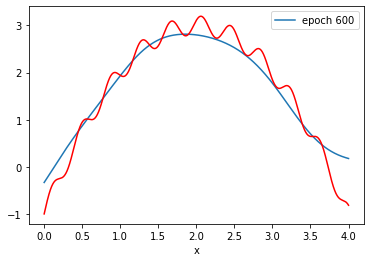

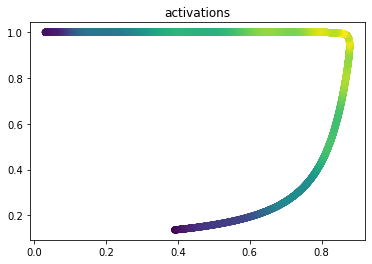

Epoch: 601 MSE: 0.5295814517885447
Epoch: 602 MSE: 0.5266998950392008
Epoch: 603 MSE: 0.5238394215703011
Epoch: 604 MSE: 0.5209992956370115
Epoch: 605 MSE: 0.518179289996624
Epoch: 606 MSE: 0.5153799168765545
Epoch: 607 MSE: 0.5126004088670015
Epoch: 608 MSE: 0.509841525927186
Epoch: 609 MSE: 0.5071015562862158
Epoch: 610 MSE: 0.5043814834207296
Epoch: 611 MSE: 0.5016816332936287
Epoch: 612 MSE: 0.499000733718276
Epoch: 613 MSE: 0.49633949622511864
Epoch: 614 MSE: 0.4936973340809345
Epoch: 615 MSE: 0.4910742100328207
Epoch: 616 MSE: 0.4884699285030365
Epoch: 617 MSE: 0.48588485829532146
Epoch: 618 MSE: 0.4833181258291006
Epoch: 619 MSE: 0.48077048920094967
Epoch: 620 MSE: 0.4782409071922302
Epoch: 621 MSE: 0.4757297523319721
Epoch: 622 MSE: 0.4732369873672724
Epoch: 623 MSE: 0.4707617238163948
Epoch: 624 MSE: 0.4683051370084286
Epoch: 625 MSE: 0.4658658318221569
Epoch: 626 MSE: 0.4634447917342186
Epoch: 627 MSE: 0.4610410165041685
Epoch: 628 MSE: 0.4586552828550339
Epoch: 629 MSE: 0.45

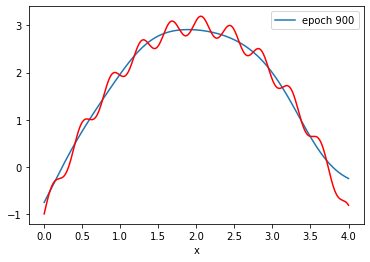

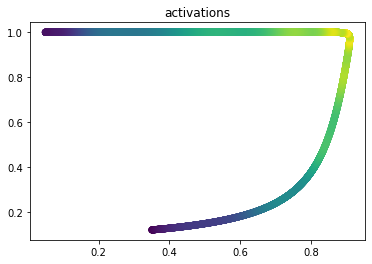

Epoch: 901 MSE: 0.18352864496409893
Epoch: 902 MSE: 0.18323142267763615
Epoch: 903 MSE: 0.18293645605444908
Epoch: 904 MSE: 0.18264371156692505
Epoch: 905 MSE: 0.1823531650006771
Epoch: 906 MSE: 0.1820647157728672
Epoch: 907 MSE: 0.18177852593362331
Epoch: 908 MSE: 0.18149446696043015
Epoch: 909 MSE: 0.18121248856186867
Epoch: 910 MSE: 0.18093261122703552
Epoch: 911 MSE: 0.180654875934124
Epoch: 912 MSE: 0.18037919141352177
Epoch: 913 MSE: 0.1801055446267128
Epoch: 914 MSE: 0.17983399331569672
Epoch: 915 MSE: 0.17956442385911942
Epoch: 916 MSE: 0.17929691448807716
Epoch: 917 MSE: 0.17903131991624832
Epoch: 918 MSE: 0.17876779101788998
Epoch: 919 MSE: 0.17850615456700325
Epoch: 920 MSE: 0.17824644967913628
Epoch: 921 MSE: 0.17798872292041779
Epoch: 922 MSE: 0.17773286439478397
Epoch: 923 MSE: 0.177479000762105
Epoch: 924 MSE: 0.17722696624696255
Epoch: 925 MSE: 0.17697677575051785
Epoch: 926 MSE: 0.176728505641222
Epoch: 927 MSE: 0.17648201435804367
Epoch: 928 MSE: 0.17623736523091793
E

In [29]:
# Entrenamiento del modelo
cost_MSE = train(x, dataset, model, optimizer, criterion, trainloader, epochs=n_epochs)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'MSE')

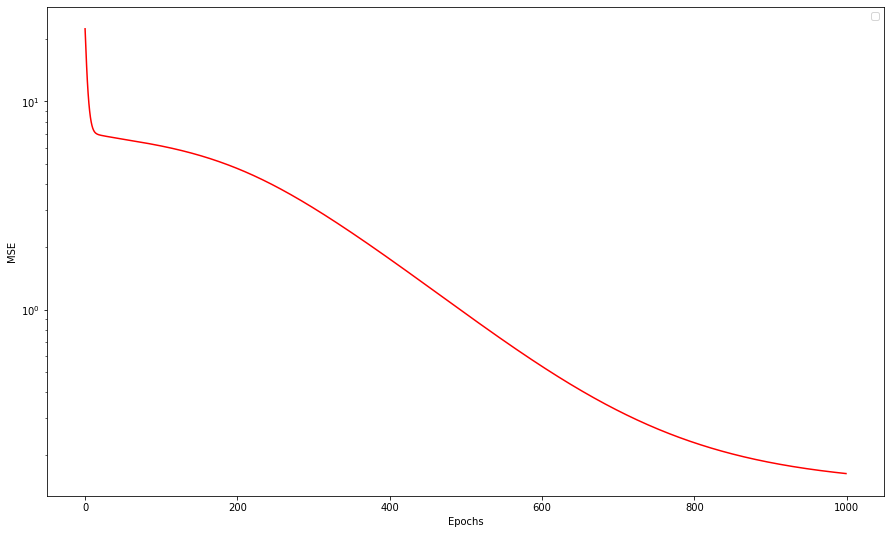

In [30]:
# Grafica MSE vs. epochs
fig1, axs1 = plt.subplots(1, sharey=True, figsize=(15, 9))
axs1.semilogy(np.arange(n_epochs), cost_MSE, linewidth=1.5, color='r')
axs1.legend()
axs1.axes.set_xlabel('Epochs')
axs1.axes.set_ylabel('MSE')